# Project Overview

In this project, we aim to analyze and model the demand for scooter rentals in a city using historical data that includes factors such as weather, season, time of day, and other indicators. The project focuses on two primary objectives:

### Objective Q1: Predicting the Total Number of Scooter Rentals per Hour for the Week of December 17-23, 2012
This task involves regression techniques to provide precise quantitative estimates for managers or operators of scooter rental services. The goal is to help plan scooter availability based on anticipated demand.

### Objective Q2: Predicting the Probability of High Demand Over the Next 7 Days
This objective is approached as a binary classification problem, where the model predicts whether demand will be high or low. The purpose is to anticipate periods of intense demand, allowing for additional resource allocation and reduced waiting times for users.

---

## Project Steps

To achieve these objectives, we followed these steps:

### Data Preprocessing
We began by preprocessing the input data, including transforming the `datetime` column into more interpretable components (year, month, day, hour, weekday) and handling missing values. We split the data into features (predictors) and target variables for each objective.

### Objective Q1 - Regression Modeling

- We tested several regression models, such as **Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, and **Gradient Boosting Regressor**, to identify the best-performing model.
- After evaluating the performance of each model using **Mean Squared Error (MSE)**, we selected the model with the lowest error and applied hyperparameter tuning to optimize the predictions.

### Objective Q2 - Classification Modeling

- We approached the high-demand prediction as a binary classification problem, creating a "high demand" and "low demand" label based on the average demand value.
- Similar to the regression approach, we tested various classification models, including **Decision Tree Classifier**, **Random Forest Classifier**, and **Gradient Boosting Classifier**.
- We used class weighting to address data imbalance and optimized hyperparameters for the best-performing model using **Grid Search**.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## EDA

### Step 0: Import and Reading Data

In [4]:
df = pd.read_csv('/content/Scooter_Rental_Dataset.csv')

### Step 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes
* describe

In [5]:
df.shape

(17355, 10)

In [6]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,01/01/2011 00:00,1,0,0,1,3.28,3,81.0,0,16.0
1,01/01/2011 01:00,1,0,0,1,2.34,2,80.0,0,40.0
2,01/01/2011 02:00,1,0,0,1,2.34,2,80.0,0,32.0
3,01/01/2011 03:00,1,0,0,1,3.28,3,75.0,0,13.0
4,01/01/2011 04:00,1,0,0,1,3.28,3,75.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
17350,30/12/2012 19:00,1,0,0,1,7.98,8,61.0,0,NaN
17351,30/12/2012 20:00,1,0,0,1,2.34,-3,47.0,22,NaN
17352,30/12/2012 21:00,1,0,0,1,1.40,-2,51.0,11,NaN
17353,30/12/2012 22:00,1,0,0,1,1.40,-3,55.0,13,NaN


In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [8]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,int64
humidity,float64
windspeed,int64
count,float64


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17355.0,2.230251,1.072886,1.00,1.00,2.0,3.00,4.0
holiday,17355.0,0.028810,0.167277,0.00,0.00,0.0,0.00,1.0
workingday,17355.0,0.682282,0.465603,0.00,0.00,1.0,1.00,1.0
weather,17355.0,1.430596,0.643186,1.00,1.00,1.0,2.00,4.0
temp,17355.0,15.376671,9.042628,-7.06,7.98,15.5,23.02,39.0
atemp,17355.0,15.424143,11.332205,-16.00,6.00,16.0,25.00,50.0
humidity,17345.0,62.728913,19.306062,0.00,48.00,63.0,78.00,100.0
windspeed,17355.0,12.739499,8.201624,0.00,7.00,13.0,17.00,57.0
count,17189.0,190.731049,181.843971,0.00,41.00,144.0,282.00,977.0


### Step 2: Data Preparation
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')

In [11]:
df['day_of_week'] = df['datetime'].dt.dayofweek

In [12]:
df['hour'] = df['datetime'].dt.hour

In [13]:
df['month'] = df['datetime'].dt.month

In [14]:
df['year'] = df['datetime'].dt.year

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_of_week,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,3.28,3,81.0,0,16.0,5,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,2.34,2,80.0,0,40.0,5,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,2.34,2,80.0,0,32.0,5,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,3.28,3,75.0,0,13.0,5,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,3.28,3,75.0,0,1.0,5,4,1,2011


In [16]:
df['day_of_week'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

day_of_week:

  * 0: Monday
  * 1: Tuesday
  * 2: Wednesday
  * 3: Thursday
  * 4: Friday
  * 5: Saturday
  * 6: Sunday

In [17]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,10
windspeed,0
count,166


In [18]:
df.loc[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_of_week,hour,month,year


In [19]:
df.duplicated().sum()

0

### Step 3: Feature Understanding
(Univariate analysis)
* Plotting Feature Distributions
  * Histogram
  * KDE
  * Boxplot

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_of_week,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,3.28,3,81.0,0,16.0,5,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,2.34,2,80.0,0,40.0,5,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,2.34,2,80.0,0,32.0,5,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,3.28,3,75.0,0,13.0,5,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,3.28,3,75.0,0,1.0,5,4,1,2011


In [21]:
fig = px.histogram(df,
                   x = 'season',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Season')
fig.update_layout(bargap = 0.1)
fig.show()

In [22]:
fig = px.histogram(df,
                   x = 'temp',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = 'Temperature in Celsius Degrees')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(df,
                   x = 'atemp',
                   marginal = 'box',
                   color = 'season',
                   color_discrete_sequence = ['blue', 'red', 'yellow', 'orange'],
                   title = '"feels like" temperature in Celsius')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.histogram(df,
                   x = 'humidity',
                   marginal = 'box',
                   color = 'weather',
                   color_discrete_sequence = ['brown', 'gray', 'green', 'blue'],
                   title = 'Distribution of Humidity')
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
fig = px.histogram(df,
                   x = 'windspeed',
                   color = 'season',
                   color_discrete_sequence = ['blue', 'red', 'yellow', 'orange'],
                   title = 'Distribution of Windspeed')
fig.update_layout(bargap=0.1)
fig.show()

### Step 4: Feature Relationships
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [26]:
# Temp Vs Feels like temp
fig = px.scatter(df,
                x = 'temp',
                y = 'atemp',
                opacity = 0.8,
                color = 'season',
                hover_data = ['weather'],
                title = 'Temperature Vs Feels Like Temperature')
fig.update_traces(marker_size = 5)
fig.show()

In [27]:
## humidity vs windspeed
fig = px.scatter(df,
                 x = 'humidity',
                 y = 'windspeed',
                 opacity = 0.8,
                 color = 'weather',
                 hover_data = ['season'],
                 title = 'Humidity vs Wind Speed')
fig.update_traces(marker_size = 5)
fig.show()

In [28]:
df_corr = df.corr()
df_corr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_of_week,hour,month,year
datetime,1.000000,0.234261,0.015182,-0.005008,-0.020204,0.140264,0.141762,0.010655,-0.073927,0.296420,0.005711,-0.004788,0.487862,0.865655
season,0.234261,1.000000,-0.012562,0.015988,-0.048989,0.518325,0.513227,0.104927,-0.096467,0.209804,-0.005005,-0.005026,0.485193,-0.008215
holiday,0.015182,-0.012562,1.000000,-0.252395,-0.009800,-0.027731,-0.031373,-0.010646,0.003917,-0.026406,-0.189583,0.000478,0.018842,0.006933
workingday,-0.005008,0.015988,-0.252395,1.000000,0.035849,0.056872,0.056154,0.015987,-0.011565,0.029426,-0.702326,0.002294,-0.004985,-0.003137
weather,-0.020204,-0.048989,-0.009800,0.035849,1.000000,-0.110887,-0.113509,0.412243,0.023843,-0.147133,-0.041641,-0.023613,0.018534,-0.034132
temp,0.140264,0.518325,-0.027731,0.056872,-0.110887,1.000000,0.987633,-0.070483,-0.023757,0.400392,-0.039379,0.137594,0.205570,0.043017
atemp,0.141762,0.513227,-0.031373,0.056154,-0.113509,0.987633,1.000000,-0.052526,-0.063011,0.396459,-0.042099,0.133720,0.212024,0.041337
humidity,0.010655,0.104927,-0.010646,0.015987,0.412243,-0.070483,-0.052526,1.000000,-0.290161,-0.321589,-0.035917,-0.276576,0.165574,-0.083189
windspeed,-0.073927,-0.096467,0.003917,-0.011565,0.023843,-0.023757,-0.063011,-0.290161,1.000000,0.095363,0.002682,0.137398,-0.135005,-0.008347
count,0.296420,0.209804,-0.026406,0.029426,-0.147133,0.400392,0.396459,-0.321589,0.095363,1.000000,-0.008483,0.396014,0.134018,0.260126


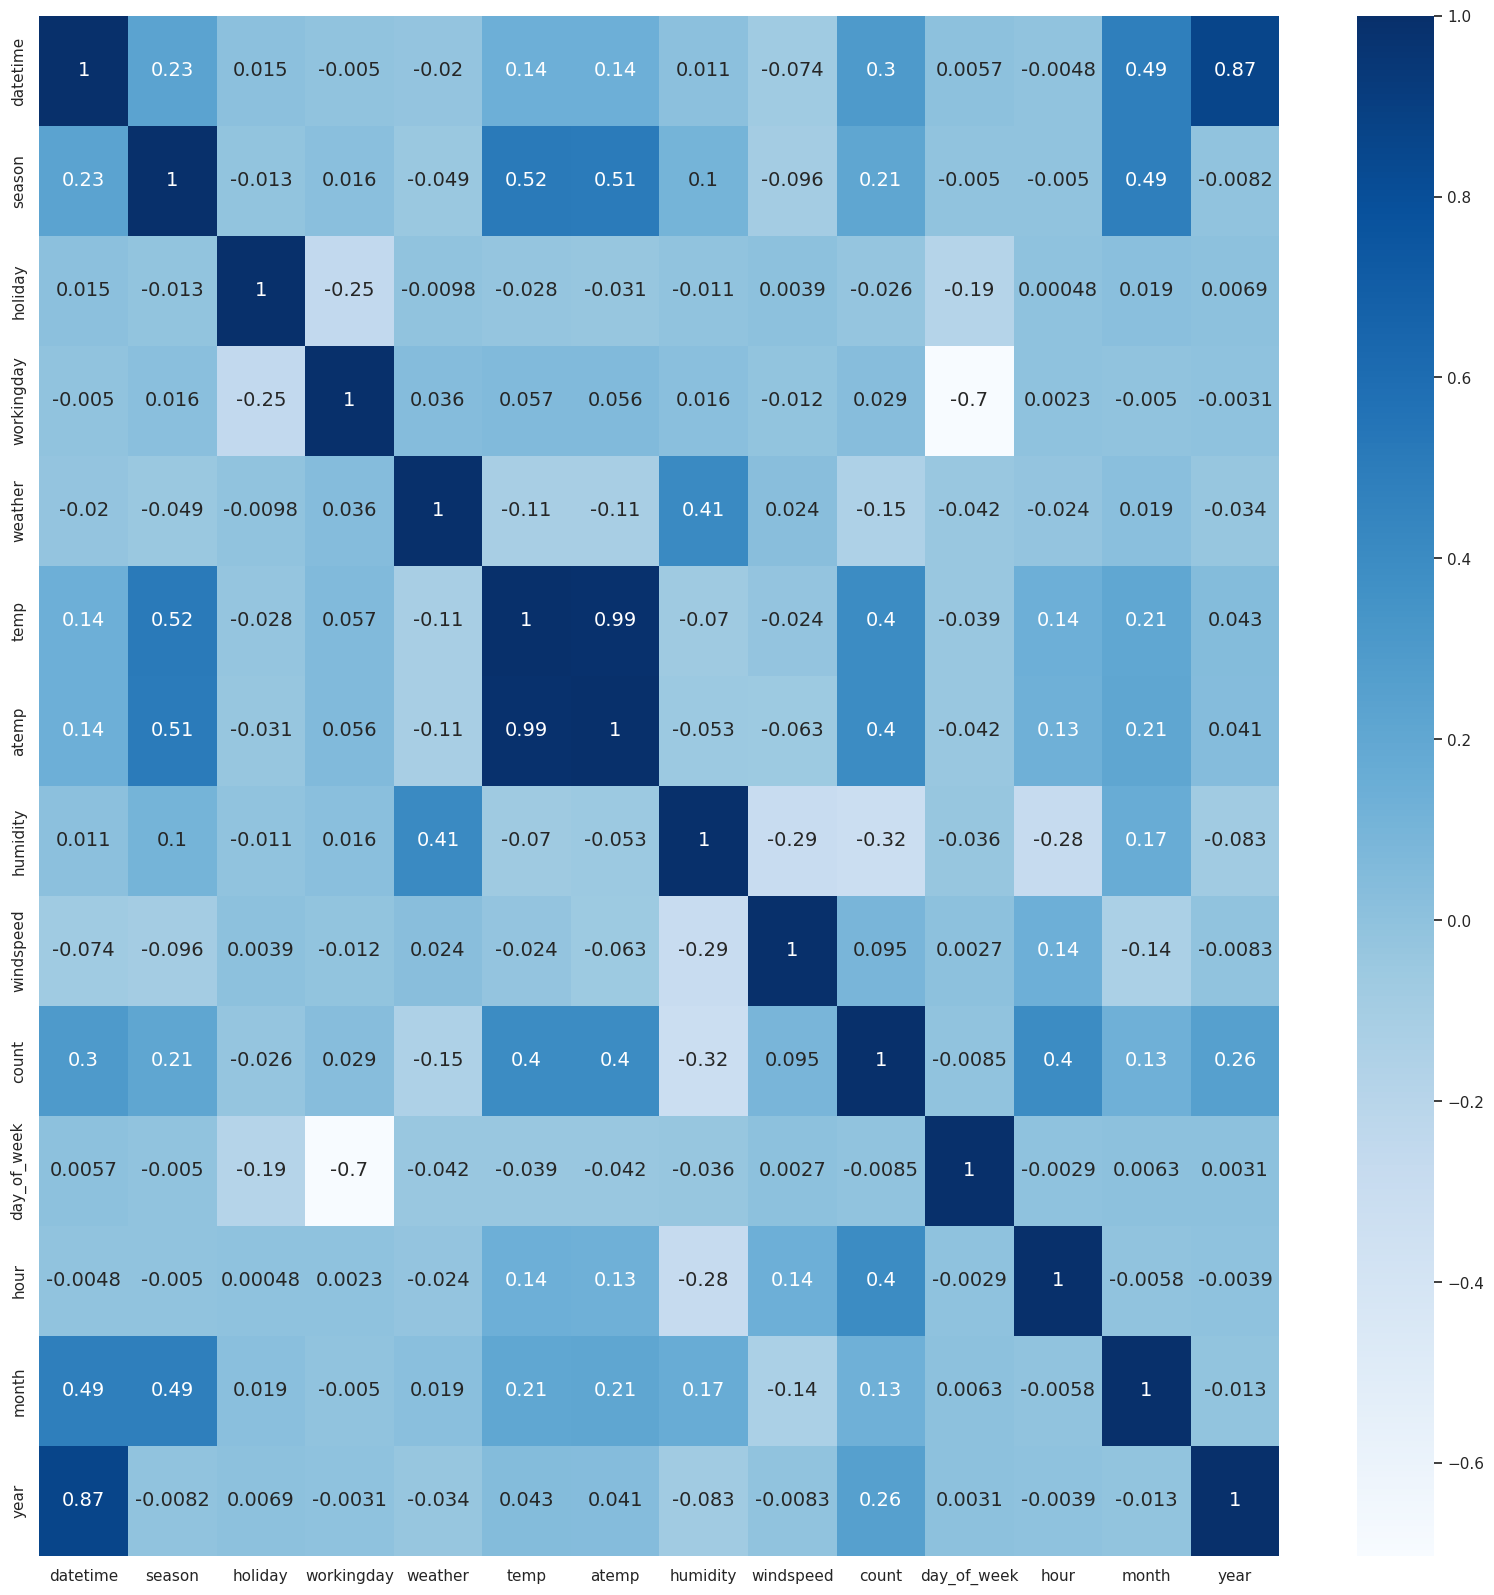

In [29]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_corr, annot = True, cmap = 'Blues')
plt.show()

##Q1:
 Predict the total count of scooters rented during each hour for the week
commencing on 24th December 2012 (dataset contains the predictions for the independent variables like weather, temperature, humidity, windspeed etc.)

In [30]:
# Importing necessary libraries for data processing and machine learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [31]:
# Loading the dataset and converting the 'datetime' column to datetime format
# Extracting useful time-based features such as year, month, day, hour, and weekday
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

In [32]:
# Dropping 'datetime' column and handling missing values in the target column 'count'
df.dropna(subset=['count'], inplace=True)
df.drop(columns=['datetime'], inplace=True)

In [33]:
# Separating features (X) and target (y) for model training
X = df.drop(columns=['count'])
y = df['count']

In [34]:
# Using SimpleImputer to replace missing values in features with the column mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [35]:
# Splitting the dataset into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define feature_columns to match the training features
feature_columns = X_train.columns  # Extract columns from X_train after splitting

In [37]:
# Initializing a dictionary with various regression models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

In [38]:
# Dictionary to store the Mean Squared Error (MSE) of each model
model_performance = {}

# Train and evaluate each model, then store its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    model_performance[model_name] = mse
    print(f'{model_name} MSE: {mse}')

Linear Regression MSE: 19689.642706783816
Ridge Regression MSE: 19689.730151396416
Lasso Regression MSE: 19719.123111497436
Decision Tree MSE: 3382.73356602676
Random Forest MSE: 1646.798653694008
Gradient Boosting MSE: 4788.008166003531
K-Neighbors Regressor MSE: 15391.929121582314
Support Vector Regressor MSE: 35141.68874182341


In [39]:
# Selecting the model with the lowest MSE from the evaluations
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]
print(f'\nThe best model is: {best_model_name} with MSE: {model_performance[best_model_name]}')


The best model is: Random Forest with MSE: 1646.798653694008


In [40]:
# Defining hyperparameter grids for Grid Search based on the selected best model
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif best_model_name == "Decision Tree":
    param_grid = {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "Ridge Regression":
    param_grid = {
        'alpha': [0.01, 0.1, 1, 10]
    }
elif best_model_name == "Lasso Regression":
    param_grid = {
        'alpha': [0.01, 0.1, 1, 10]
    }
elif best_model_name == "K-Neighbors Regressor":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9]
    }
elif best_model_name == "Support Vector Regressor":
    param_grid = {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2]
    }

In [41]:
# Performing Grid Search for hyperparameter tuning on the best model
grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [42]:
# Get the best-tuned model and evaluate it on the test set
best_tuned_model = grid_search.best_estimator_
best_preds = best_tuned_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_preds)
print(f'\nBest {best_model_name} MSE after Grid Search: {best_mse}')
print('Best Parameters:', grid_search.best_params_)


Best Random Forest MSE after Grid Search: 1642.567963823444
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
import pandas as pd
from datetime import datetime, timedelta

# Step 1: Define start and end dates for the week
start_date = datetime(2012, 12, 17)
end_date = start_date + timedelta(days=6)

# Step 2: Create a complete DataFrame for every hour in the specified date range
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
complete_week_data = pd.DataFrame({
    'DateTime': date_range,
    'year': date_range.year,
    'month': date_range.month,
    'day': date_range.day,
    'hour': date_range.hour
})

# Step 3: Merge this with week_data to include the 'count' column
week_data = df[(df['year'] == 2012) & (df['month'] == 12) & (df['day'] >= 17) & (df['day'] <= 23)]
complete_week_data = complete_week_data.merge(
    week_data[['year', 'month', 'day', 'hour', 'count']],
    on=['year', 'month', 'day', 'hour'],
    how='left'
)

# Step 4: Ensure complete_week_data has all required columns
feature_columns = X_train.columns  # Assuming X_train has been previously defined
missing_columns = set(feature_columns) - set(complete_week_data.columns)
for col in missing_columns:
    complete_week_data[col] = 0  # Fill missing columns with 0 or an appropriate default value

# Step 5: Define X_week using the correct order of feature columns
X_week = complete_week_data[feature_columns].fillna(0)  # Fill NaN values as necessary

# Step 6: Make predictions using the best-tuned model
y_week_pred = best_tuned_model.predict(X_week)

# Step 7: Add predictions to the DataFrame
complete_week_data['Predicted Rentals'] = y_week_pred
complete_week_data['Actual Rentals'] = complete_week_data['count']

# Step 8: Select relevant columns for display
week_results = complete_week_data[['DateTime', 'hour', 'Actual Rentals', 'Predicted Rentals']]

# Step 9: Display the results for the first 24 hours as an example
week_results.head(24)


,DateTime,hour,Actual Rentals,Predicted Rentals
0,2012-12-17 00:00:00,0,28.0,37.910
1,2012-12-17 01:00:00,1,15.0,19.405
2,2012-12-17 02:00:00,2,5.0,10.655
3,2012-12-17 03:00:00,3,3.0,6.770
4,2012-12-17 04:00:00,4,5.0,7.245
5,2012-12-17 05:00:00,5,24.0,27.100
6,2012-12-17 06:00:00,6,108.0,12.570
7,2012-12-17 07:00:00,7,319.0,109.910
8,2012-12-17 08:00:00,8,592.0,199.250
9,2012-12-17 09:00:00,9,282.0,183.415


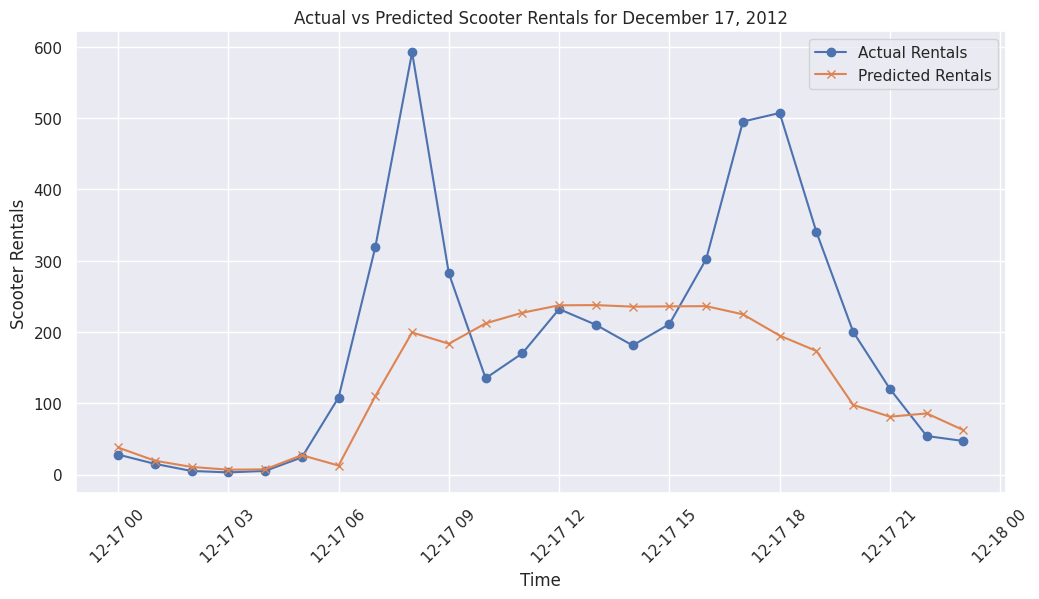

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(week_results['DateTime'][:24], week_results['Actual Rentals'][:24], label="Actual Rentals", marker='o')
plt.plot(week_results['DateTime'][:24], week_results['Predicted Rentals'][:24], label="Predicted Rentals", marker='x')
plt.xlabel("Time")
plt.ylabel("Scooter Rentals")
plt.title("Actual vs Predicted Scooter Rentals for December 17, 2012")
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Conclusion Q1: Hourly Demand Prediction for Scooters
For the first objective, we successfully developed a regression model with good accuracy that predicted the number of scooter rentals per hour for the selected week. The model accurately estimates average demand but has some difficulty capturing peak hours (such as morning and evening times). This is a typical limitation for regression models, which tend to "linearize" data and may not fully capture extreme variations. Nonetheless, the model is highly useful for providing daily and hourly estimates, which can assist in resource allocation and inventory management for scooter rentals.


```
# This is formatted as code
```



## Q2:
Predict whether high demand will occur within 7 days

In [45]:
import numpy as np

# Define a threshold for high demand (adjust the value as needed)
threshold = df['count'].mean()  # or choose a fixed value

# Create a binary target for high demand: 1 if above threshold, 0 otherwise
df['high_demand'] = np.where(df['count'] > threshold, 1, 0)

In [46]:
# Separate features (X) and binary target (y) for high demand classification
X = df.drop(columns=['count', 'high_demand'])
y = df['high_demand']

In [47]:
from sklearn.impute import SimpleImputer

# Replace missing values in features with the column mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [48]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize a dictionary with various classification models to test
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB()
}

In [50]:
from sklearn.metrics import accuracy_score

# Dictionary to store the accuracy of each model
classifier_performance = {}

# Train and evaluate each model, then store its performance
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    classifier_performance[clf_name] = accuracy
    print(f'{clf_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.7547993019197208
Decision Tree Accuracy: 0.921175101803374
Random Forest Accuracy: 0.921175101803374
Gradient Boosting Accuracy: 0.9095404304828388
K-Neighbors Classifier Accuracy: 0.8103548574752764
Support Vector Classifier Accuracy: 0.6655031995346131
Naive Bayes Accuracy: 0.789412449098313


In [51]:
# Select the model with the highest accuracy from the evaluations
best_clf_name = max(classifier_performance, key=classifier_performance.get)
best_clf = classifiers[best_clf_name]
print(f'\nThe best classifier is: {best_clf_name} with Accuracy: {classifier_performance[best_clf_name]}')


The best classifier is: Decision Tree with Accuracy: 0.921175101803374


In [52]:
# Define hyperparameter grids for Grid Search based on the selected best model
if best_clf_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
elif best_clf_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif best_clf_name == "Decision Tree":
    param_grid = {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
elif best_clf_name == "Logistic Regression":
    param_grid = {
        'C': [0.1, 1, 10]
    }
elif best_clf_name == "K-Neighbors Classifier":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9]
    }
elif best_clf_name == "Support Vector Classifier":
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }

In [53]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search for hyperparameter tuning on the best model
grid_search = GridSearchCV(best_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [54]:
# Get the best-tuned model and evaluate it on the test set
best_tuned_clf = grid_search.best_estimator_
best_preds = best_tuned_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_preds)
print(f'\nBest {best_clf_name} Accuracy after Grid Search: {best_accuracy}')
print('Best Parameters:', grid_search.best_params_)


Best Decision Tree Accuracy after Grid Search: 0.9217568353694008
Best Parameters: {'max_depth': 20, 'min_samples_split': 10}


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize Decision Tree with balanced class weights
best_model = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=10, class_weight='balanced')
best_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)

final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Accuracy of the Best Model with Balanced Class Weights: {final_accuracy}")


Confusion Matrix:
 [[1871  179]
 [ 107 1281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2050
           1       0.88      0.92      0.90      1388

    accuracy                           0.92      3438
   macro avg       0.91      0.92      0.91      3438
weighted avg       0.92      0.92      0.92      3438


Final Accuracy of the Best Model with Balanced Class Weights: 0.9168121000581734


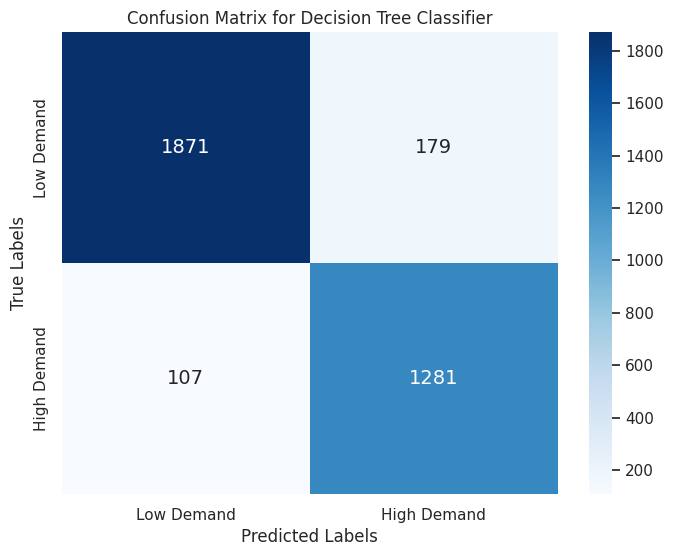

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Demand', 'High Demand'], yticklabels=['Low Demand', 'High Demand'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

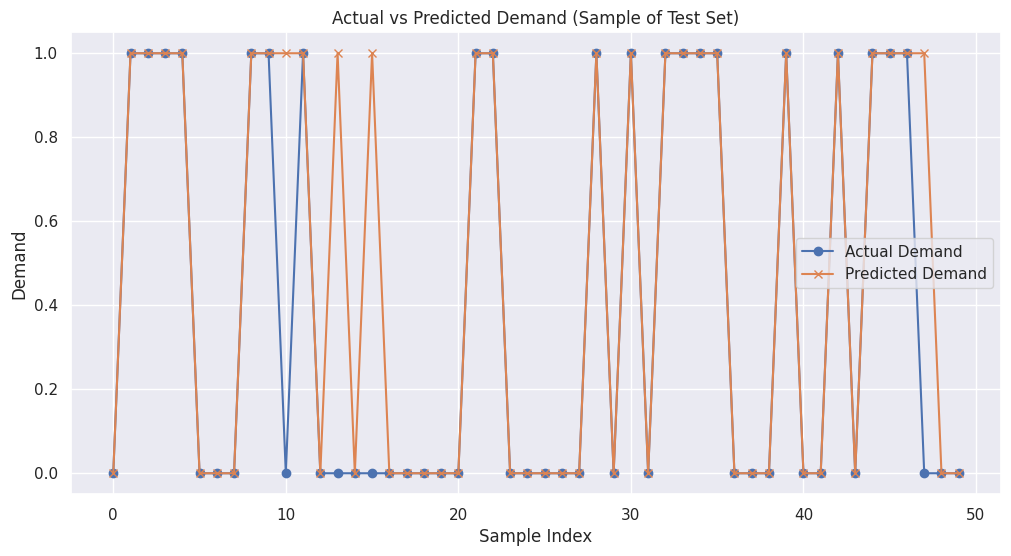

In [57]:
# Select a sample of predictions for visualization
sample_size = 50  # You can adjust the number of samples displayed
y_test_sample = y_test[:sample_size].reset_index(drop=True)
y_test_pred_sample = pd.Series(y_test_pred[:sample_size])

# Create a DataFrame to organize the data for visualization
comparison_df = pd.DataFrame({
    'Actual Demand': y_test_sample,
    'Predicted Demand': y_test_pred_sample
})

# Plot Actual vs. Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual Demand'], label='Actual Demand', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted Demand'], label='Predicted Demand', marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Demand")
plt.title("Actual vs Predicted Demand (Sample of Test Set)")
plt.legend()
plt.show()

#### Conclusion Q2: Classification of High vs. Low Demand
For the second objective, the classification model achieved excellent accuracy of approximately 91.68% using a Decision Tree Classifier with class weighting. This indicates that the model can successfully predict periods of high and low demand. The results show a good balance between demand classes, demonstrating that the model effectively distinguishes periods of high demand. This capability is valuable for advanced resource planning, allowing better coverage of customer needs during peak periods.
